# Exploratory Data Analysis

In [3]:
from cslib import fetch_data, convert_to_ts
import matplotlib.pyplot as plt

## Load and transform data

In [5]:
# Fetch training data
df = fetch_data("cs_train")
df.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,17998.0,28,489562,11,5.95,84656,1,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


In [6]:
# Transform training data to timeseries dataframe
df_ts = convert_to_ts(df)
df_ts.head()

# Save dataframe
df_ts.to_csv("data/cs_train/ts_train_data")

## Data Analysis

### Number of unique days and the dataset span

In [7]:
print("Number of unique days: ", df.invoice_date.nunique())

first_day=df_ts['date'].iloc[0] # first element 
last_day=df_ts['date'].iloc[-1] # last element 
total_days = (last_day - first_day)
print("The dataset spans for ", total_days)


Number of unique days:  495
The dataset spans for  606 days 00:00:00


### Countries by total revenue

In [17]:
df_grouped = df.groupby("country").sum()
df_grouped.sort_values('price', ascending=False).head(3)

,customer_id,day,month,price,times_viewed,year
country,,,,,,
United Kingdom,2.759899e+09,3455741,2308092,931655.782,1173070,464575938
France,5.556953e+07,64096,43982,26648.170,36324,8944170
Germany,5.431722e+07,58183,42434,18292.630,35894,8657472


### Number of missed values by feature

In [10]:
df.isna().sum()

country              0
customer_id     189762
day                  0
invoice              0
month                0
price                0
stream_id            0
times_viewed         0
year                 0
invoice_date         0
dtype: int64

### Revenue time series for all countries

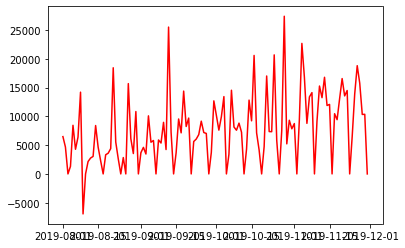

In [14]:
plt.plot(df_ts.date, df_ts.revenue, 'r')

## Data Analysis for validation dataset

In [12]:
# PRUDCTION DATA

# Fetch data
df = fetch_data("cs_production")
print(df.head())

# Transform data to timeseries dataframe
df_ts = convert_to_ts(df)
print(df_ts.head())

# Save dataframe
df_ts.to_csv("data/cs_production/ts_prod_data")

# Number of unique days and the dataset span
print("Number of unique days: ", df.invoice_date.nunique())

first_day=df_ts['date'].iloc[0] # first element 
last_day=df_ts['date'].iloc[-1] # last element 
total_days = (last_day - first_day)
print("The dataset spans for ", total_days)

# Countries by total revenue
df_grouped = df.groupby("country").sum()
print(df_grouped.sort_values('price', ascending=False).head(3))

# Number of missed values by feature
print(df.isna().sum())


          country  customer_id  day invoice  month  price stream_id  \
0  United Kingdom          NaN    1  562417      8   8.29     40016   
1           Spain      12502.0    1  562273      8   3.95     23012   
2  United Kingdom      12971.0    1  562272      8   1.25     21447   
3  United Kingdom      12971.0    1  562272      8   2.95     22807   
4  United Kingdom      12971.0    1  562272      8   0.85     22156   

   times_viewed  year invoice_date  
0             1  2019   2019-08-01  
1             4  2019   2019-08-01  
2             5  2019   2019-08-01  
3             6  2019   2019-08-01  
4            12  2019   2019-08-01  
        date  purchases  unique_invoices  unique_streams  total_views  \
0 2019-08-01       1839               99             905        12229   
1 2019-08-02       1455               66             842         7801   
2 2019-08-03          0                0               0            0   
3 2019-08-04        541               33             409   